In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

df = pd.read_csv("../data/freq_data.csv")

df = df[(df["Exposure"] > 0) & (df["Exposure"] <= 1)].copy()

y = df["ClaimNb"].astype(float)
X = df.drop(columns=["ClaimNb"])


In [7]:
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
cat_features = []  # already encoded

cat_model = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    iterations=300,
    loss_function="MAE",
    verbose=False
)

cat_model.fit(X_train, y_train)

cat_pred = cat_model.predict(X_test)

cat_mae = mean_absolute_error(y_test, cat_pred)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_pred))

cat_mae, cat_rmse


(0.04001798721294433, 0.21225057634217565)

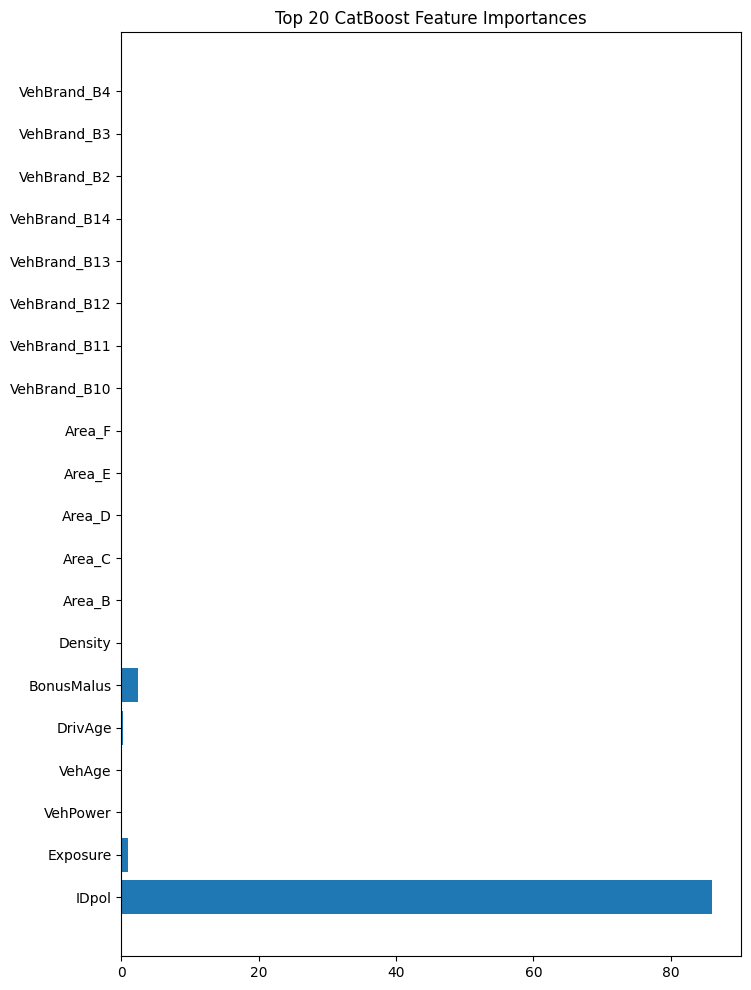

In [9]:
importance = cat_model.get_feature_importance()
feature_names = X_train.columns

plt.figure(figsize=(8, 12))
plt.barh(feature_names[:20], importance[:20])
plt.title("Top 20 CatBoost Feature Importances")
plt.show()



In [10]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    tree_method='hist'
)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

xgb_mae, xgb_rmse


(0.07327817502414588, 0.20369303783187415)

In [11]:
import os
os.makedirs("../outputs", exist_ok=True)


In [12]:
cat_pred = cat_model.predict(X_test)


In [13]:
import pandas as pd

pred_df = pd.DataFrame({"pred": cat_pred})
pred_df.to_csv("../outputs/catboost_predictions.csv", index=False)

print("Saved CatBoost predictions to ../outputs/catboost_predictions.csv")


Saved CatBoost predictions to ../outputs/catboost_predictions.csv


In [14]:
import os
os.listdir("../outputs")


['catboost_predictions.csv']